In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('forbes_2640_billionaires.csv', index_col = 0, header = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 1 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2640 non-null   object 
 1   forbes_id           2640 non-null   object 
 2   net_worth           2640 non-null   float64
 3   age                 2575 non-null   float64
 4   age_range           2640 non-null   int64  
 5   country             2640 non-null   object 
 6   source              2640 non-null   object 
 7   industry            2640 non-null   object 
 8   Age                 2555 non-null   float64
 9   Source of Wealth    2639 non-null   object 
 10  Self-Made Score     558 non-null    float64
 11  Philanthropy Score  411 non-null    float64
 12  Residence           2581 non-null   object 
 13  Citizenship         2629 non-null   object 
 14  Marital Status      2089 non-null   object 
 15  Children            1598 non-null   float64
 16  Educat

In [6]:
df.head()

,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
rank,,,,,,,,,,,,,,,,,,,,,
1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


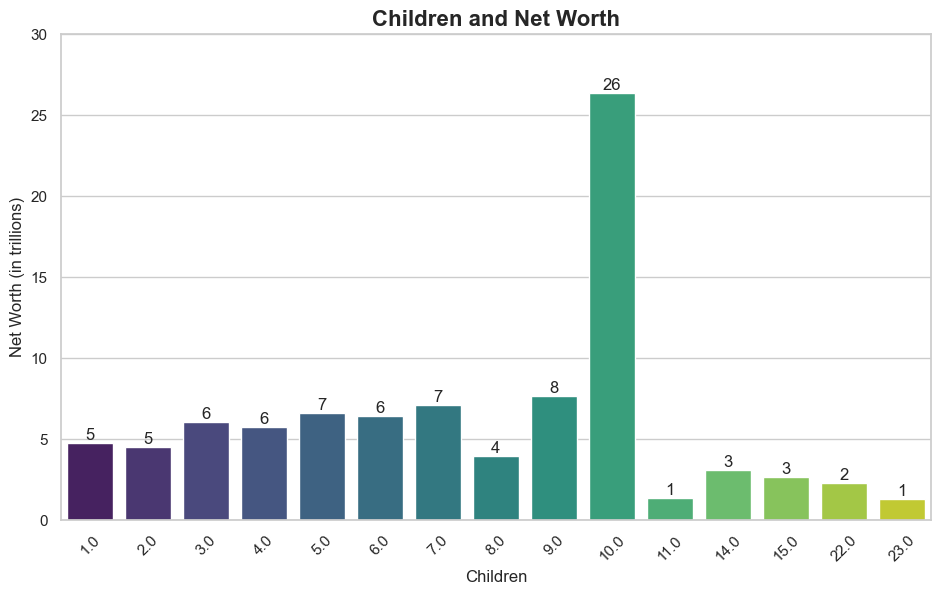

In [35]:
# set style
sns.set(style = "whitegrid")

# set figure size
plt.figure(figsize=(10,6))

# create bar plot
ax = sns.barplot(x= 'Children', y = 'net_worth', data = df, palette = "viridis", errorbar= None)
plt.title('Children and Net Worth', fontsize = 16, fontweight = 'bold')
plt.xlabel('Children')
plt.ylabel('Net Worth (in trillions)')

# rotate x axis labels so it is easier to read
plt.xticks(rotation = 45)

# adjust y axis scale
plt.ylim(0, 30)

# add count numbers on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom')
# display results
plt.show()

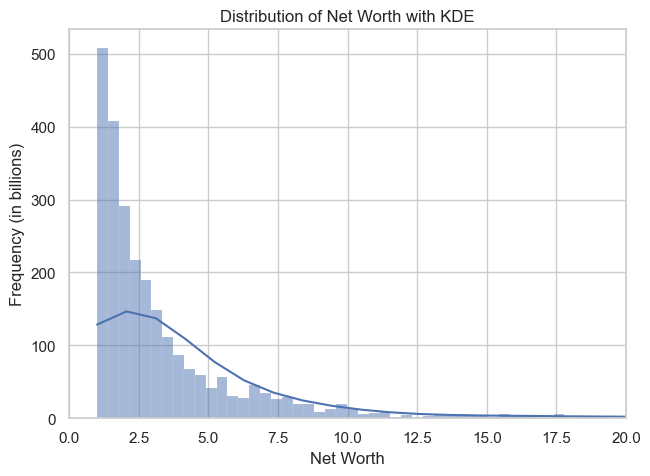

In [8]:
num_bins = 20
# Define range for x-axis
x_range = (0,20)

# Create the histogram 
sns.histplot(df['net_worth'], kde=True)
plt.xlabel('Net Worth')
plt.ylabel('Frequency (in billions)')
plt.title('Distribution of Net Worth with KDE')

plt.xlim(x_range)
plt.show()

# NET WORTH IS IN BILLIONS

In [9]:
# Group by industry and country and count the billionaires in each combination
industry_country_counts = df.groupby(['industry', 'Citizenship']).size().reset_index(name='Billionaire Count')

# Find the country with the most billionaires in each industry
max_billionaires_per_industry = industry_country_counts.groupby('industry').max()


# Display the result
print(max_billionaires_per_industry)


                              Citizenship  Billionaire Count
industry                                                    
Automotive                        Vietnam                 18
Construction & Engineering  United States                  5
Diversified                       Vietnam                 21
Energy                      United States                 34
Fashion & Retail            United States                 57
Finance & Investments             Vietnam                183
Food & Beverage                   Vietnam                 71
Gambling & Casinos          United States                  6
Healthcare                  United States                 65
Logistics                   United States                  8
Manufacturing                     Vietnam                138
Media & Entertainment       United States                 38
Metals & Mining             United States                 18
Real Estate                 United States                 49
Service                 

In [10]:
# Count how mnay billionaires in each category of relationship status
relationship_counts = df['Marital Status'].value_counts()

#display result
print(relationship_counts)

Married               1711
Divorced               140
Widowed                121
Single                  76
In Relationship         18
Widowed, Remarried      11
Separated               10
Engaged                  2
Name: Marital Status, dtype: int64


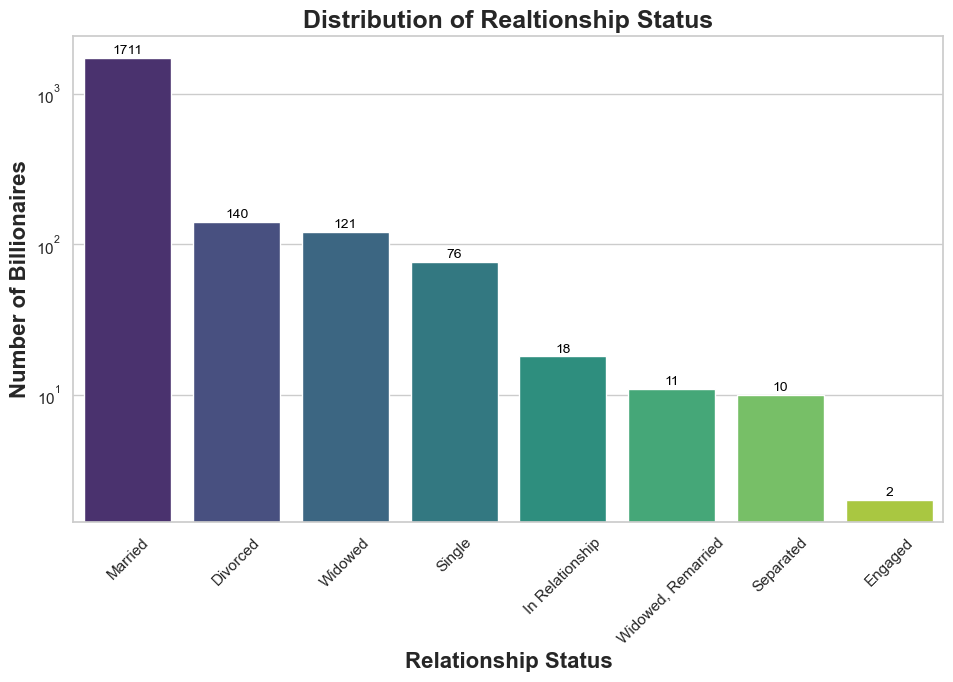

In [11]:
# group data in Marital Status column and count
realtionship_counts = df['Marital Status'].value_counts()

# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = relationship_counts.index, y = relationship_counts.values, palette = "viridis")
ax.set_yscale("log")
plt.title('Distribution of Realtionship Status', fontsize = 18, fontweight = 'bold')
plt.xlabel('Relationship Status', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 45)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()

In [12]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

print(top_10_billionaires)

                           name          forbes_id  net_worth   age  \
rank                                                                  
1      Bernard Arnault & family    bernard-arnault      211.0  74.0   
2                     Elon Musk          elon-musk      180.0  51.0   
3                    Jeff Bezos         jeff-bezos      114.0  59.0   
4                 Larry Ellison      larry-ellison      107.0  78.0   
5                Warren Buffett     warren-buffett      106.0  92.0   
6                    Bill Gates         bill-gates      104.0  67.0   
7             Michael Bloomberg  michael-bloomberg       94.5  81.0   
8     Carlos Slim Helu & family   carlos-slim-helu       93.0  83.0   
9                 Mukesh Ambani      mukesh-ambani       83.4  65.0   
10                Steve Ballmer      steve-ballmer       80.7  67.0   

      age_range        country              source               industry  \
rank                                                                  

In [19]:
top_10_billionaires = df.sort_values(by= 'net_worth', ascending = False).head(10)

for index, row in top_10_billionaires.iterrows():
    print(f"Name: {row['name']}")
    print(f"Net Worth: {row['net_worth']} billion")
    print(f"Age: {row['age']}")
    print(f"Country: {row['country']}")
    print(f"Source of Wealth: {row['source']}")
    print(f"Industry: {row['industry']}")
    print(f"Marital Status: {row['Marital Status']}")
    print(f"Number of Children: {row['Children']}")
    print(f"Education: {row['Education']}")
    print('-' * 50)    

Name: Bernard Arnault & family
Net Worth: 211.0 billion
Age: 74.0
Country: France
Source of Wealth: LVMH
Industry: Fashion & Retail
Marital Status: Married
Number of Children: 5.0
Education: Bachelor of Arts/Science, Ecole Polytechnique de Paris
--------------------------------------------------
Name: Elon Musk
Net Worth: 180.0 billion
Age: 51.0
Country: United States
Source of Wealth: Tesla, SpaceX
Industry: Automotive
Marital Status: Single
Number of Children: 10.0
Education: Bachelor of Arts/Science, University of Pennsylvania
--------------------------------------------------
Name: Jeff Bezos
Net Worth: 114.0 billion
Age: 59.0
Country: United States
Source of Wealth: Amazon
Industry: Technology
Marital Status: Engaged
Number of Children: 4.0
Education: Bachelor of Arts/Science, Princeton University
--------------------------------------------------
Name: Larry Ellison
Net Worth: 107.0 billion
Age: 78.0
Country: United States
Source of Wealth: Oracle
Industry: Technology
Marital Sta

Bachelor     972.0
Master       524.0
Doctorate     52.0
Drop Out      85.0
dtype: float64


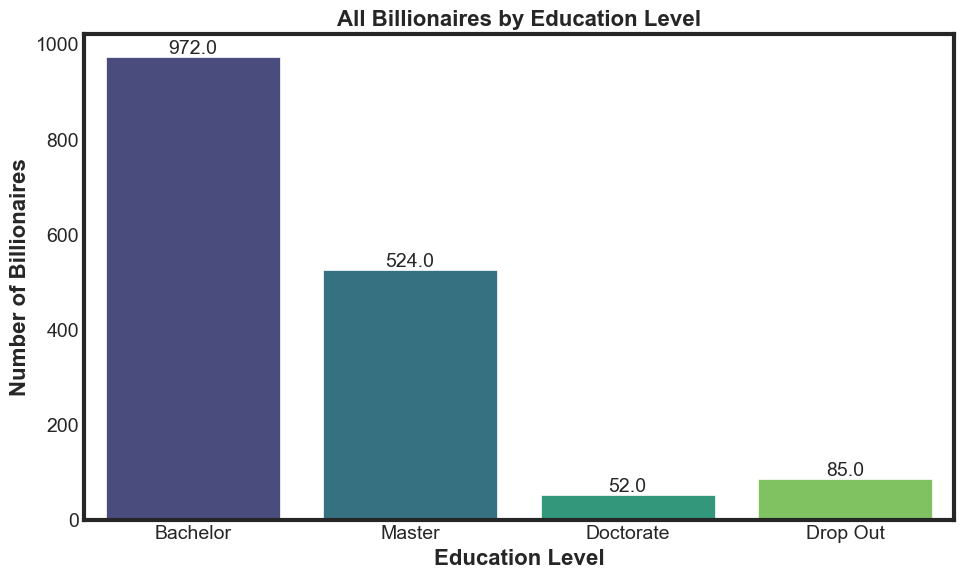

In [29]:
# Calculate the counts for each education level
education_counts = df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()
print(education_counts)
# Create a bar plot
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('All Billionaires by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [48]:
df = pd.read_csv('forbes_2640_billionaires.csv', index_col = 0, header = 0)
""""
df['Bachelor'][df['Bachelor']==1.0]='Bach '
df['Master'][df['Master']==1.0]='Mast'
df['Doctorate'][df['Doctorate']==1.0]='Doc'
df['Drop Out'][df['Drop Out']==1.0]='DO'
df['Final Education'] = df['Bachelor'] + df['Master'] + df['Doctorate'] + df['Drop Out']
df['net_worth'].groupby(df['Final Education']).agg('median')
"""

'"\ndf[\'Bachelor\'][df[\'Bachelor\']==1.0]=\'Bach \'\ndf[\'Master\'][df[\'Master\']==1.0]=\'Mast\'\ndf[\'Doctorate\'][df[\'Doctorate\']==1.0]=\'Doc\'\ndf[\'Drop Out\'][df[\'Drop Out\']==1.0]=\'DO\'\ndf[\'Final Education\'] = df[\'Bachelor\'] + df[\'Master\'] + df[\'Doctorate\'] + df[\'Drop Out\']\ndf[\'net_worth\'].groupby(df[\'Final Education\']).agg(\'median\')\n'

In [57]:
education_df = df[['net_worth','Bachelor','Master','Doctorate','Drop Out']]
education_df = education_df.dropna()
education_df

,net_worth,Bachelor,Master,Doctorate,Drop Out
rank,,,,,
1,211.0,1.0,0.0,0.0,0.0
2,180.0,1.0,0.0,0.0,0.0
3,114.0,1.0,0.0,0.0,0.0
4,107.0,0.0,0.0,0.0,1.0
5,106.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
2540,1.0,0.0,1.0,0.0,0.0
2540,1.0,1.0,0.0,0.0,0.0
2540,1.0,0.0,0.0,0.0,1.0


In [18]:
print(df['net_worth'].groupby([df['Bachelor']]).agg('median'))
print(df['net_worth'].groupby([df['Master']]).agg('median'))
print(df['net_worth'].groupby([df['Doctorate']]).agg('median'))
print(df['net_worth'].groupby([df['Drop Out']]).agg('median'))

Bachelor
0.0    2.7
1.0    2.8
Name: net_worth, dtype: float64
Master
0.0    2.8
1.0    2.7
Name: net_worth, dtype: float64
Doctorate
0.0    2.7
1.0    4.2
Name: net_worth, dtype: float64
Drop Out
0.0    2.7
1.0    3.6
Name: net_worth, dtype: float64


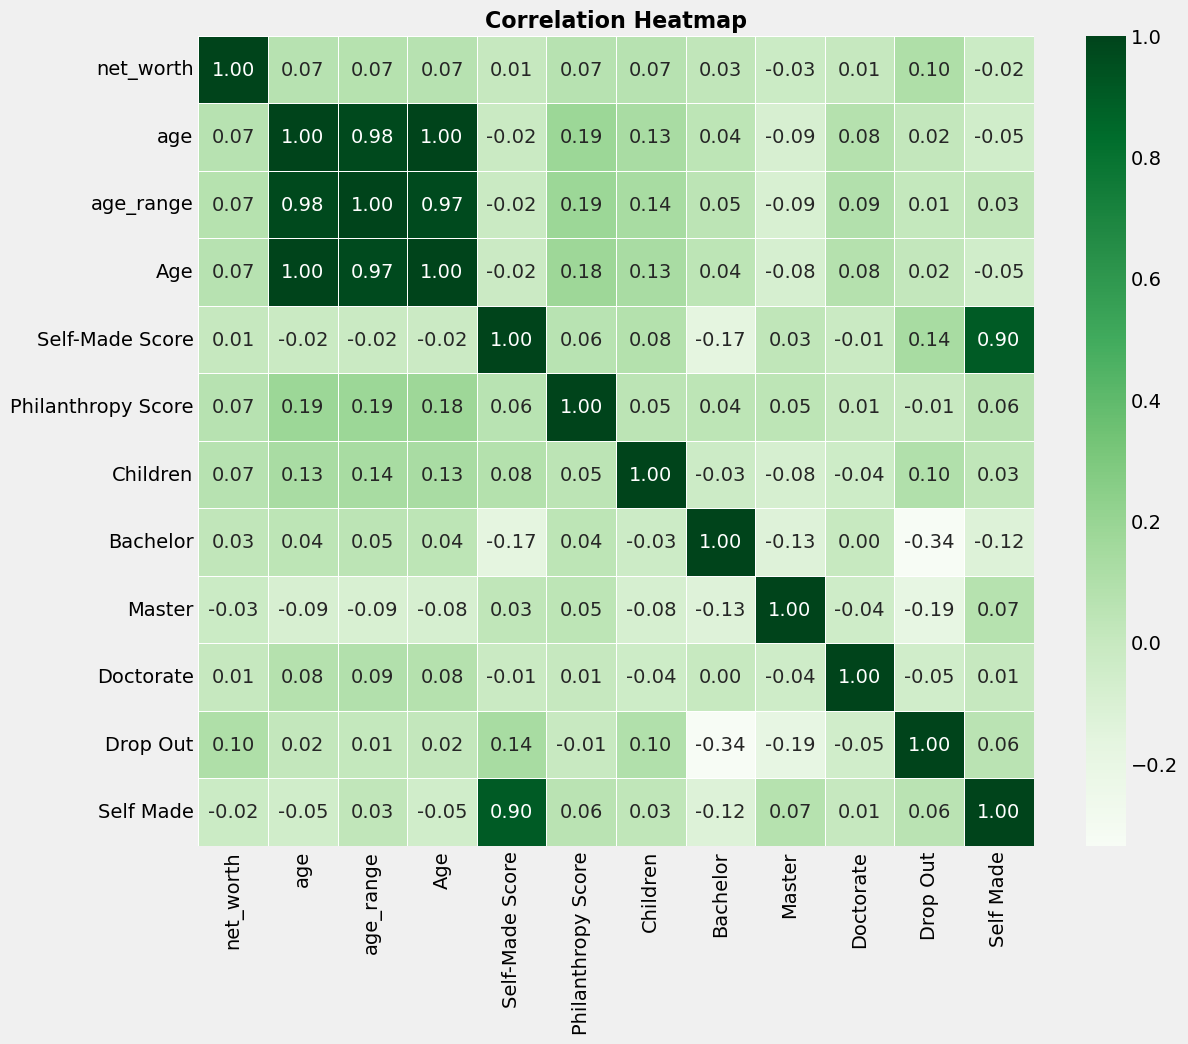

In [58]:
# create correlation matrix
correlation_matrix = df.corr()

# create a heatmap
plt.figure(figsize= (12 ,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens', fmt = ".2f", linewidths = 0.5 )

#title
plt.title('Correlation Heatmap', fontsize = 16, fontweight = 'bold')

# display
plt.show()

0.75    4.2
Name: net_worth, dtype: float64

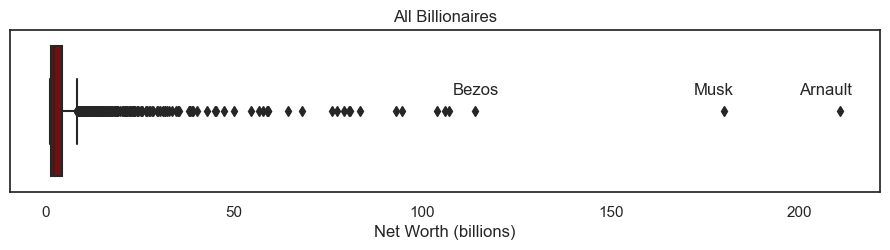

In [43]:
#Highlighting the bias of billionaires in this sample denoting the need for removal of outliers
plt.figure(figsize=(10,2))
sns.set_style('white')
all_nw = sns.boxplot(data = df, x = 'net_worth',color='maroon')
all_nw.set_title('All Billionaires')
all_nw.set_xlabel('Net Worth (billions)')
plt.text(200,-.1,'Arnault')
plt.text(172,-.1,'Musk')
plt.text(108,-.1,'Bezos')


# 75th percentile of billionaires 
df['net_worth'].quantile([.75])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 659 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1982 non-null   object 
 1   forbes_id           1982 non-null   object 
 2   net_worth           1982 non-null   float64
 3   age                 1922 non-null   float64
 4   age_range           1982 non-null   int64  
 5   country             1982 non-null   object 
 6   source              1982 non-null   object 
 7   industry            1982 non-null   object 
 8   Age                 1907 non-null   float64
 9   Source of Wealth    1981 non-null   object 
 10  Self-Made Score     311 non-null    float64
 11  Philanthropy Score  192 non-null    float64
 12  Residence           1933 non-null   object 
 13  Citizenship         1973 non-null   object 
 14  Marital Status      1521 non-null   object 
 15  Children            1119 non-null   float64
 16  Educ

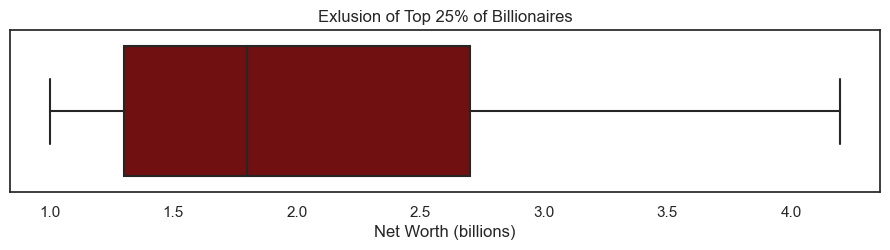

In [44]:
#Seperating the data into 75th percentile and top 25%
new_df = df[df['net_worth']<=4.2]
top_25 = df[df['net_worth']>4.2]

#Plotting 75th percentile of billionaires
plt.figure(figsize=(10,2))
sns.set_style('white')
all_nw = sns.boxplot(data = new_df, x = 'net_worth',color='maroon')
all_nw.set_title('Exlusion of Top 25% of Billionaires')
all_nw.set_xlabel('Net Worth (billions)')

new_df.info()

In [7]:
#Verifying number of billionaires left in stratified data
new_df['Self Made'].value_counts()

#Creating new subdata set for only self made billionaires within the 75th percentile
self_df = new_df[new_df['Self Made']==1]
self_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 659 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1381 non-null   object 
 1   forbes_id           1381 non-null   object 
 2   net_worth           1381 non-null   float64
 3   age                 1358 non-null   float64
 4   age_range           1381 non-null   int64  
 5   country             1381 non-null   object 
 6   source              1381 non-null   object 
 7   industry            1381 non-null   object 
 8   Age                 1346 non-null   float64
 9   Source of Wealth    1381 non-null   object 
 10  Self-Made Score     220 non-null    float64
 11  Philanthropy Score  135 non-null    float64
 12  Residence           1361 non-null   object 
 13  Citizenship         1372 non-null   object 
 14  Marital Status      1045 non-null   object 
 15  Children            749 non-null    float64
 16  Educ

Bachelor     451.0
Master       275.0
Doctorate     20.0
Drop Out      41.0
dtype: float64


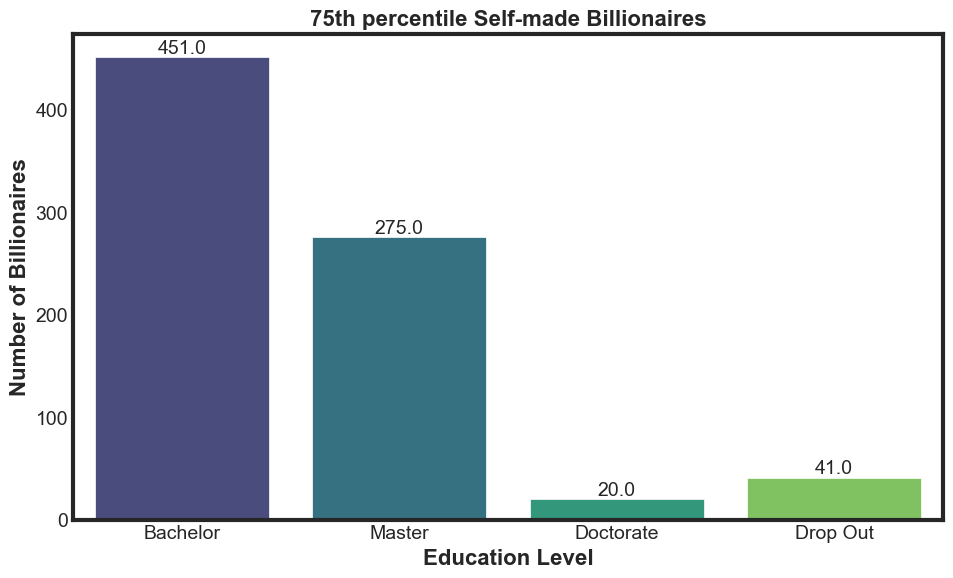

In [10]:
# Calculate the counts for each education level within the 75% percentile of billionaires
education_counts = self_df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()
print(education_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('75th percentile Self-made Billionaires', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

Bachelor     310.0
Master       163.0
Doctorate     25.0
Drop Out      34.0
dtype: float64


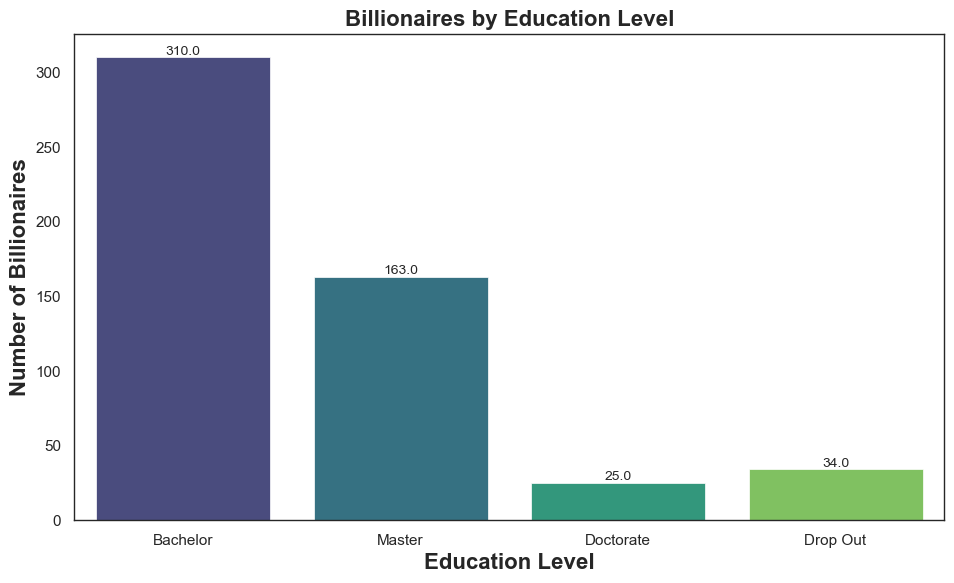

In [190]:
# Calculate the counts for each education level within the 75% percentile of billionaires
education_counts = top_25[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()
print(education_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('Billionaires by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [19]:
tech_df = pd.DataFrame(self_df[self_df['industry']=='Technology'])
tech_df.info()

gamble_df = self_df[self_df['industry']=='Gambling & Casinos']
gamble_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 659 to 2540
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                217 non-null    object 
 1   forbes_id           217 non-null    object 
 2   net_worth           217 non-null    float64
 3   age                 213 non-null    float64
 4   age_range           217 non-null    int64  
 5   country             217 non-null    object 
 6   source              217 non-null    object 
 7   industry            217 non-null    object 
 8   Age                 213 non-null    float64
 9   Source of Wealth    217 non-null    object 
 10  Self-Made Score     56 non-null     float64
 11  Philanthropy Score  35 non-null     float64
 12  Residence           212 non-null    object 
 13  Citizenship         214 non-null    object 
 14  Marital Status      163 non-null    object 
 15  Children            93 non-null     float64
 16  Educa

Bachelor     123.0
Master        69.0
Doctorate      2.0
Drop Out       9.0
dtype: float64


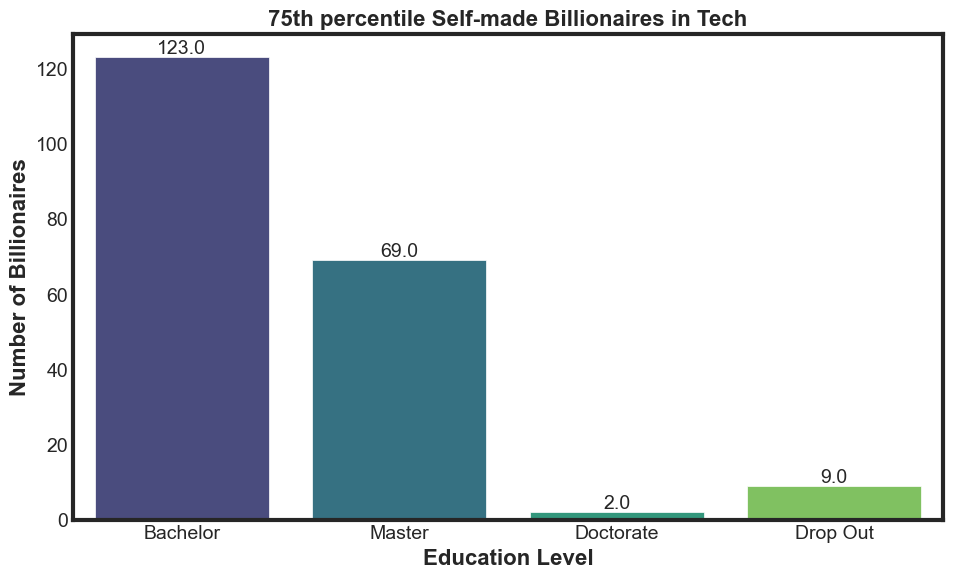

In [20]:
# Calculate the counts for each education level
education_counts = tech_df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()
print(education_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette = "viridis")
plt.title('75th percentile Self-made Billionaires in Tech', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

Bachelor     5.0
Master       0.0
Doctorate    0.0
Drop Out     1.0
dtype: float64


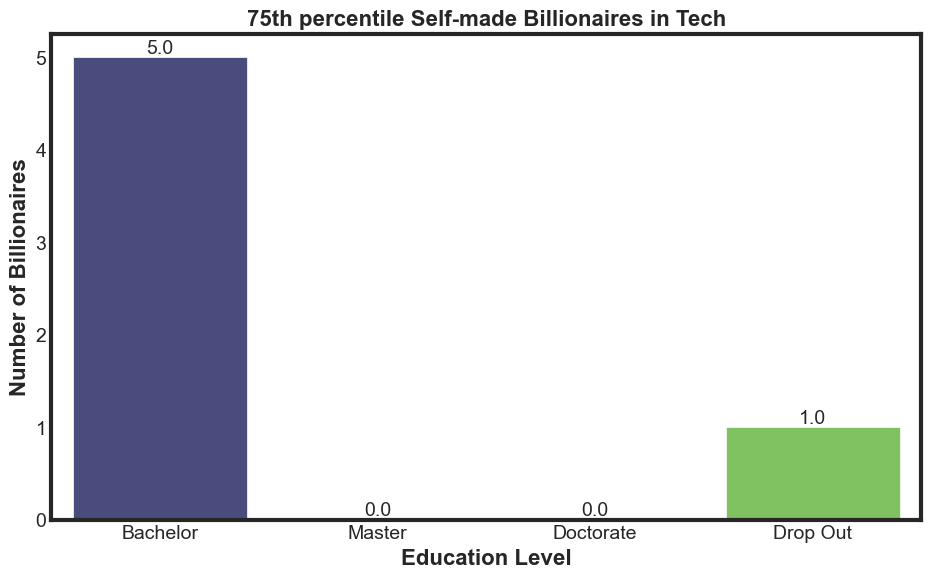

In [23]:
# Calculate the counts for each education level
ed_count = gamble_df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].sum()
print(ed_count)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ed_count.index, y=ed_count.values, palette = "viridis")
plt.title('75th percentile Self-made Billionaires in Tech', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize = 16, fontweight = "bold")
plt.ylabel('Number of Billionaires', fontsize = 16, fontweight = "bold")

# Display the counts on top of the bars
for i, count in enumerate(ed_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

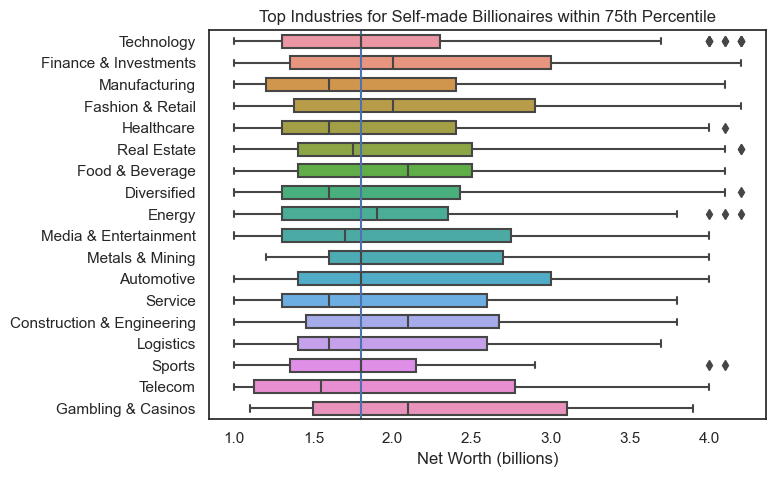

In [191]:
# Net worth by industry for selfmade billionaires within the 75th percentile 
# Bar plots are organized in decreasing order of frequncy
sns.set_theme()
sns.set_style('white')
ind_counts = pd.DataFrame(self_df['industry'].value_counts())
ind = sns.boxplot(
    data = self_df,
    y='industry',
    x= 'net_worth',
    width=0.6,
    order=ind_counts.index)
ind.set_xlabel('Net Worth (billions)')
ind.set_ylabel('')
ind.set_title('Top Industries for Self-made Billionaires within 75th Percentile')

# Added veritcal line for the median Net Worth for all billionaires in the 75th percentile
# Allowing for comparison of industries before better or worse than an average
ind.axvline(x=self_df['net_worth'].median())
